Note: The underlying assumption is that user inputs forecasted revenue in million of dollars scaling! 

Please, provide forecasted net premium: 
300
Please, provide forecasted net premium deviation: 
30
Please, provide forecasted other income: 
30
Please, provide forecasted other income deviation: 
30
Please, provide forecasted net_claims : 
30
Please, provide forecasted net claims deviation: 
30
Please, provide forecasted underwriting expenses: 
30
Please, provide forecasted underwriting expenses deviation: 
30
Please, provide other forecasted expenses: 
30
Please, provide forecasted other expenses deviation: 
30
Please, provide forecasted tax rate, %: 
30
Please, provide new expenses if any; otherwise, put 0: 
30


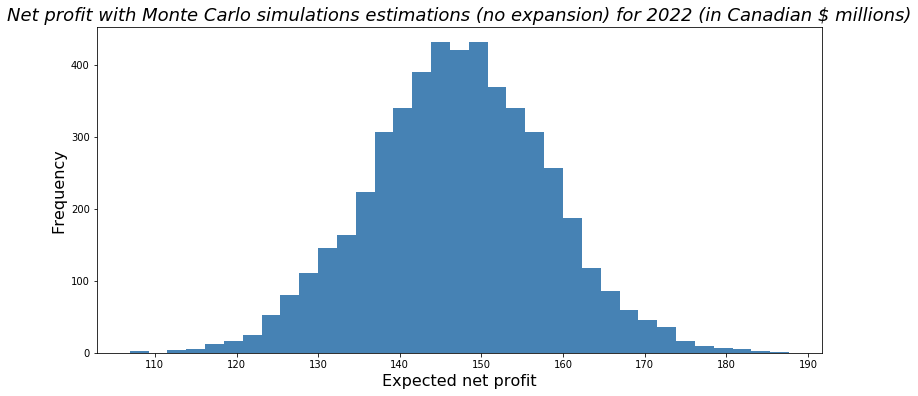

The mean net profit is:  147.18 $ 

Minimum possible net profit (worst-case scenario) is:  106.91 $ 

Maximum possible net profit (best-case scenario) is:  187.7 $ 

Without applying the model, the expected net profit based just on our forecasts would be 147.0 $ 



In [3]:
#This program calculates net profit for Viable Insurance. Since income statement is small and only for two quarters,
#I'll predict for three remaining (till the end of the year). Numbers are taken as numerical (not percentage of income), 
#since we have all the required predictions.


#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt


#declaring number of iterations equal to 5000 and creating list for storing values of simulation
n = 5000
monte_list1 = []




#asking user/manager to provide the program with required predictions

#Real question is what numbers for standard deviation we should choose; I'd stick with deviation = 30 for all,
#since we are anyways making predicted deviations as % of input value
print("Note: The underlying assumption is that user inputs forecasted revenue in million of dollars scaling! \n")

net_prem = float(input('Please, provide forecasted net premium: \n'))
net_prem_std = float(input('Please, provide forecasted net premium deviation: \n'))
net_prem_std = net_prem_std/100


other_income = float(input('Please, provide forecasted other income: \n'))
other_income_std = float(input('Please, provide forecasted other income deviation: \n'))
other_income_std = other_income_std/100


net_claims= float(input('Please, provide forecasted net_claims : \n'))
net_claims_std = float(input('Please, provide forecasted net claims deviation: \n'))
net_claims_std = net_claims_std/100


under= float(input('Please, provide forecasted underwriting expenses: \n'))
under_std = float(input('Please, provide forecasted underwriting expenses deviation: \n'))
under_std = under_std/100


other_exp = float(input('Please, provide other forecasted expenses: \n'))
other_exp_dev = float(input('Please, provide forecasted other expenses deviation: \n'))
other_exp_dev = other_exp_dev/100


tax = float(input('Please, provide forecasted tax rate, %: \n'))
tax = tax/100

new_expenses = float(input('Please, provide new expenses if any; otherwise, put 0: \n'))

#new_exp_dev = float(input('Please, provide forecasted new expenses deviation, if any expenses take place: \n'))
#new_exp_dev = new_exp_dev/100



#main function, respobsible for performing Monte Carlo simulations
def simulations(q):

    #function that takes # of iterations as input and then perform that number of Monte Carlo simulations inside

    def monte_carlo_net(iterr):

        rev1 = np.random.normal(net_prem, net_prem_std*net_prem, iterr)         
        
        other_income_est = np.random.normal(other_income, other_income*other_income_std) 
        
        total_rev = other_income_est + rev1

        net_claims_sim = np.random.normal(net_claims, net_claims*net_claims_std) 

        underwriting = np.random.normal(under,under_std)
        
        other_expenses = np.random.normal(other_exp,other_exp * other_exp_dev)
        
        #new exp
        
        #new_exp = np.random.normal(new_exp,new_exp * new_exp_dev)
        
        #delete later
        #new_exp = 0

        before_tax = total_rev - net_claims_sim - underwriting - other_expenses - new_expenses    
                           

        return before_tax.mean()                            #returns the mean of all given # of iterations' results


    #calculations of mean of the list
    def Average(l):
        return sum(l) / len(l)


    #function that performs another loop of operations using monte_carlo_net function output to get more precise results
    def monte_sim1(n):
        #for i in range(n):
        a = monte_carlo_net(n)
        monte_list1.append(a)



    #start of running program; calculation performed in monte_carlo_net are passed into monte_sim1, then getting into
    #this loop; all of the above operations give a pretty reliable precision

    for i in range(n):
        monte_sim1(n)

    
    
    
    #not taxing negative income
    for i in range(len(monte_list1)):
        if monte_list1[i]< 0:
            monte_list1[i] = monte_list1[i]
        else:
            monte_list1[i] = (1-tax)*monte_list1[i]
            
    #plotting expected profit distribution via histogram
    plt.figure(figsize = (13,6))
    plt.hist(monte_list1, bins = 35, color = 'steelblue')
    plt.xlabel("Expected net profit", size = 16)
    plt.ylabel("Frequency", size = 16)
    plt.title("Net profit with Monte Carlo simulations estimations (no expansion)(in Canadian $ millions)", fontsize=18, color='black', style='italic' )
    plt.show()
        
        
    #returns average, max and min results of the simulation results
    return Average(monte_list1), min(monte_list1), max(monte_list1)



#returns results and graph for 5000 Monte Carlo simulations
store_values = simulations(n)

#prints the expected result that is based just on initial predictions, not subject to simulations
if (net_prem + other_income - net_claims - under - other_exp)<0:
    exp_res = (net_prem + other_income - net_claims - under - other_exp- new_expenses)
else:
    exp_res = (net_prem + other_income - net_claims - under - other_exp- new_expenses)* (1-tax)


#prints mean, min and max results, as well as exp_res
print("The mean net profit is: ", round(store_values[0], 2), "$ \n")
print("Minimum possible net profit (worst-case scenario) is: ", round(store_values[1], 2), "$ \n")
print("Maximum possible net profit (best-case scenario) is: ", round(store_values[2], 2), "$ \n")

print("Without applying the model, the expected net profit based just on our forecasts would be", round(exp_res,2),"$ \n")

In [13]:
exp_res


107.2

Note: The underlying assumption is that user inputs forecasted revenue in million of dollars scaling! 

Please, provide forecasted net premium: 
5833
Please, provide forecasted net premium deviation: 
5
Please, provide forecasted other income: 
720
Please, provide forecasted other income deviation: 
3
Please, provide forecasted net_claims : 
3689
Please, provide forecasted net claims deviation: 
5
Please, provide forecasted underwriting expenses: 
2218
Please, provide forecasted underwriting expenses deviation: 
3
Please, provide other forecasted expenses: 
292
Please, provide forecasted other expenses deviation: 
3
Please, provide forecasted tax rate, %: 
20
Please, provide new expenses if any; otherwise, put 0: 
165


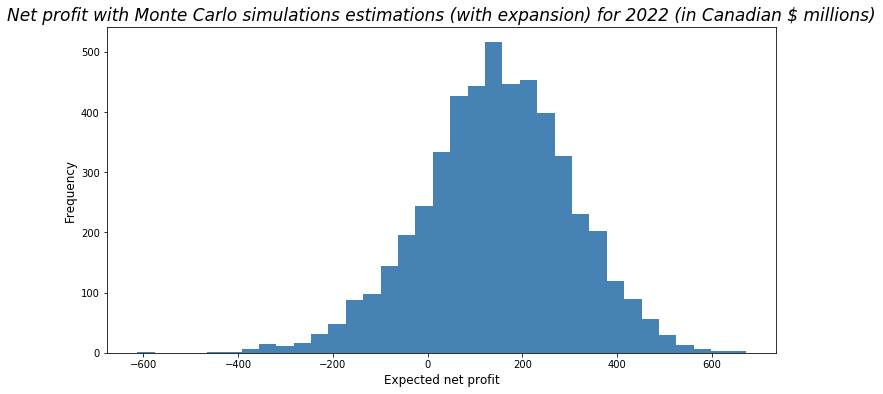

The mean net profit is:  146.57 $ 

Minimum possible net profit (worst-case scenario) is:  -612.96 $ 

Maximum possible net profit (best-case scenario) is:  671.74 $ 

Without applying the model, the expected net profit based just on our forecasts would be 151.2 $ 



In [28]:
#This program calculates net profit for Viable Insurance. Since income statement is small and only for two quarters,
#I'll predict for three remaining (till the end of the year). Numbers are taken as numerical (not percentage of income), 
#since we have all the required predictions.


#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt


#declaring number of iterations equal to 5000 and creating list for storing values of simulation
n = 5000
monte_list1 = []




#asking user/manager to provide the program with required predictions

#Real question is what numbers for standard deviation we should choose; I'd stick with deviation = 30 for all,
#since we are anyways making predicted deviations as % of input value
print("Note: The underlying assumption is that user inputs forecasted revenue in million of dollars scaling! \n")

net_prem = float(input('Please, provide forecasted net premium: \n'))
net_prem_std = float(input('Please, provide forecasted net premium deviation: \n'))
net_prem_std = net_prem_std/100


other_income = float(input('Please, provide forecasted other income: \n'))
other_income_std = float(input('Please, provide forecasted other income deviation: \n'))
other_income_std = other_income_std/100


net_claims= float(input('Please, provide forecasted net_claims : \n'))
net_claims_std = float(input('Please, provide forecasted net claims deviation: \n'))
net_claims_std = net_claims_std/100


under= float(input('Please, provide forecasted underwriting expenses: \n'))
under_std = float(input('Please, provide forecasted underwriting expenses deviation: \n'))
under_std = under_std/100


other_exp = float(input('Please, provide other forecasted expenses: \n'))
other_exp_dev = float(input('Please, provide forecasted other expenses deviation: \n'))
other_exp_dev = other_exp_dev/100


tax = float(input('Please, provide forecasted tax rate, %: \n'))
tax = tax/100

new_expenses = float(input('Please, provide new expenses if any; otherwise, put 0: \n'))

#new_exp_dev = float(input('Please, provide forecasted new expenses deviation, if any expenses take place: \n'))
#new_exp_dev = new_exp_dev/100



#main function, respobsible for performing Monte Carlo simulations
def simulations(q):

    #function that takes # of iterations as input and then perform that number of Monte Carlo simulations inside

    def monte_carlo_net(iterr):

        rev1 = np.random.normal(net_prem, net_prem_std*net_prem, iterr)         
        
        other_income_est = np.random.normal(other_income, other_income*other_income_std) 
        
        total_rev = other_income_est + rev1

        net_claims_sim = np.random.normal(net_claims, net_claims*net_claims_std) 

        underwriting = np.random.normal(under,under_std)
        
        other_expenses = np.random.normal(other_exp,other_exp * other_exp_dev)
        
        #new exp
        
        #new_exp = np.random.normal(new_exp,new_exp * new_exp_dev)
        
        #delete later
        #new_exp = 0

        before_tax = total_rev - net_claims_sim - underwriting - other_expenses - new_expenses    
                           

        return before_tax.mean()                            #returns the mean of all given # of iterations' results


    #calculations of mean of the list
    def Average(l):
        return sum(l) / len(l)


    #function that performs another loop of operations using monte_carlo_net function output to get more precise results
    def monte_sim1(n):
        #for i in range(n):
        a = monte_carlo_net(n)
        monte_list1.append(a)



    #start of running program; calculation performed in monte_carlo_net are passed into monte_sim1, then getting into
    #this loop; all of the above operations give a pretty reliable precision

    for i in range(n):
        monte_sim1(n)

    
    
    
    #not taxing negative income
    for i in range(len(monte_list1)):
        if monte_list1[i]< 0:
            monte_list1[i] = monte_list1[i]
        else:
            monte_list1[i] = (1-tax)*monte_list1[i]
            
    #plotting expected profit distribution via histogram
    plt.figure(figsize = (12,6))
    plt.hist(monte_list1, bins = 35, color = 'steelblue')
    plt.xlabel("Expected net profit", size = 12)
    plt.ylabel("Frequency", size = 12)
    plt.title("Net profit with Monte Carlo simulations estimations (with expansion) (in Canadian $ millions)", fontsize=17, color='black', style='italic' )
    plt.show()
        
        
    #returns average, max and min results of the simulation results
    return Average(monte_list1), min(monte_list1), max(monte_list1)



#returns results and graph for 5000 Monte Carlo simulations
store_values = simulations(n)

#prints the expected result that is based just on initial predictions, not subject to simulations
if (net_prem + other_income - net_claims - under - other_exp)<0:
    exp_res = (net_prem + other_income - net_claims - under - other_exp- new_expenses)
else:
    exp_res = (net_prem + other_income - net_claims - under - other_exp- new_expenses)* (1-tax)


#prints mean, min and max results, as well as exp_res
print("The mean net profit is: ", round(store_values[0], 2), "$ \n")
print("Minimum possible net profit (worst-case scenario) is: ", round(store_values[1], 2), "$ \n")
print("Maximum possible net profit (best-case scenario) is: ", round(store_values[2], 2), "$ \n")

print("Without applying the model, the expected net profit based just on our forecasts would be", round(exp_res,2),"$ \n")